16 16
99 a: -1.1513145 b: 5.929935 c: -4.081536 d: 6.190865 loss: 65.31145
199 a: -2.0109353 b: 6.9507217 c: -2.356899 d: 9.783665 loss: 31.657421
299 a: -1.735579 b: 5.330037 c: -0.96931815 d: 11.9741535 loss: 20.66188
399 a: -1.0085672 b: 3.0273752 c: -0.57703614 d: 13.496872 loss: 14.640881
499 a: -0.29435092 b: 0.93351865 c: -0.47543338 d: 14.643831 loss: 11.174821
599 a: 0.27290753 b: -0.7061597 c: -0.4336369 d: 15.504938 loss: 9.375288
699 a: 0.6838267 b: -1.8909796 c: -0.40817812 d: 16.122066 loss: 8.540092
799 a: 0.9626043 b: -2.694389 c: -0.39153653 d: 16.539762 loss: 8.192983
899 a: 1.1406981 b: -3.2075677 c: -0.38101384 d: 16.80642 loss: 8.063754
999 a: 1.2479551 b: -3.5166128 c: -0.37469834 d: 16.966972 loss: 8.020689


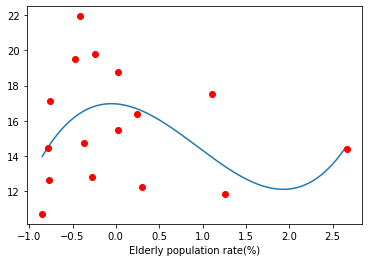

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]
print(len(X),len(Y))

#a,b,c 랜덤값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

def compute_loss():
    y_pred=a* X*X*X + b * X*X + c * X + d  # 3차함수식
    loss = tf.reduce_mean((Y-y_pred) ** 2) #전차의 제곱 평균
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07) #활성화 함수로 Adam사용
for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [a,b,c,d])
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:',d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X),max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c* line_x + d

plt.plot(line_x, line_y)
plt.plot(X,Y,'ro')
plt.xlabel('population Growth rate(%)')
plt.xlabel('Elderly population rate(%)')
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 254.0524
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 137.3331
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 24.2702
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 9.8937
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6869
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 9.6631
Epoch 7/10
1/1 [==============================] - 0s 

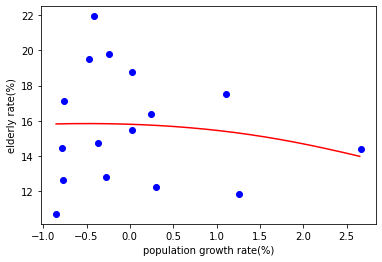

In [15]:
import tensorflow as tf
import numpy as np

X = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation = 'tanh', input_shape= (1,)),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()
model.fit(X,Y, epochs = 10) # 학습하기
model.predict(X)

import matplotlib.pyplot as plt

line_x = np.arange(min(X),max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y,'r-')
plt.plot(X,Y, 'bo')
plt.xlabel('population growth rate(%)')
plt.ylabel('elderly rate(%)')
plt.show()

404 404
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_17 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_18 (Dense)             (None, 21)                756       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 22        
Total params: 3,263
Trainable params: 3,263
Non-trainable param

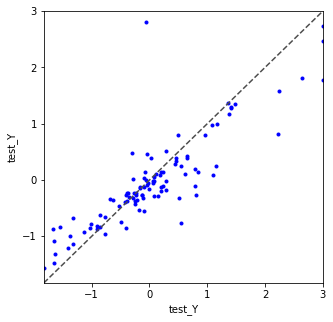

In [5]:
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(train_Y))
print(train_X[0])
print(train_Y[0])

x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units = 35, activation = 'relu'),
    tf.keras.layers.Dense(units = 21, activation = 'relu'),
    tf.keras.layers.Dense(units= 1) #출력은 1개
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')
model.summary()
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)


pred_Y = model.predict(test_X)
plt.figure(figsize = (5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y) , max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y) , max(test_Y)],[ min(test_Y), max(test_Y)], ls = '--', c = ".3")
plt.xlabel('test_Y')
plt.ylabel('test_Y')
plt.show()